# Script to map external files to SalishSeaCast grid and create the respective netcdf file

## Importing

In [34]:
import xarray as xr
import numpy as np
import os
from tqdm import tqdm
from salishsea_tools import grid_tools as gt

## Loading datasets

In [35]:
# Mask loading
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()
mask = mask[0,0]

# Daily time_counter loading
ds0 = xr.open_dataset('/data/ibougoudis/MOAD/files/integrated_original.nc')


## Testing

In [36]:
# Coordinates
coords_hourly = dict(hour=np.arange(0,24), y=ds0.y, x=ds0.x)
coords = dict(time_counter= ds0.time_counter, y=ds0.y, x=ds0.x)

# Hourly arrays
solar_hourly = xr.DataArray(coords=coords_hourly, dims = ['hour', 'y', 'x'])
u_hourly = xr.DataArray(coords=coords_hourly, dims = ['hour', 'y', 'x'])
v_hourly = xr.DataArray(coords=coords_hourly, dims = ['hour', 'y', 'x'])

# Daily arrays
solar = xr.DataArray(coords=coords, dims = ['time_counter', 'y', 'x'])
wind_speed = xr.DataArray(coords=coords, dims = ['time_counter', 'y', 'x'])

j=0
file_name = ('/results/forcing/atmospheric/continental2.5/nemo_forcing/hrdps_y2024m03d15.nc')
weight = ('/home/sallen/MEOPAR/grid/weights-continental2.5-hrdps_202108_23feb23onward.nc')
inter, grid = gt.build_matrix(weight, file_name)
for i in tqdm(range(0,24)):
 
    solar_hourly[i] = gt.use_matrix(file_name, inter, grid, 'solar', i)
    u_hourly[i] =  gt.use_matrix(file_name, inter, grid, 'u_wind', i)
    v_hourly[i] =  gt.use_matrix(file_name, inter, grid, 'v_wind', i)

solar[j] = solar_hourly.where(mask==1).mean('hour')
wind_speed[j] = np.sqrt(u_hourly**2 + v_hourly**2).where(mask==1).mean('hour')


100%|██████████| 24/24 [00:04<00:00,  5.42it/s]


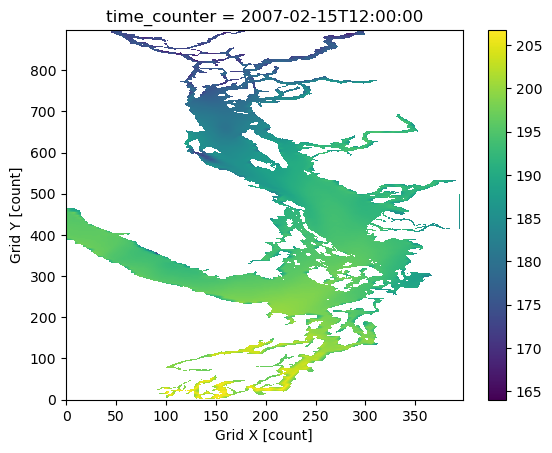

In [37]:
solar[j].plot()

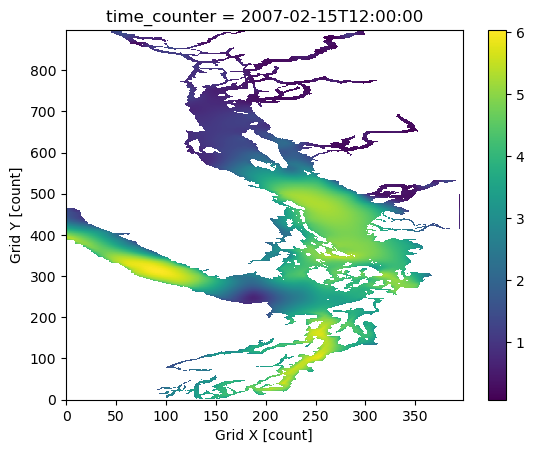

In [38]:
wind_speed[j].plot()